# SPICED Academy /// Project Week 08 /// Markov Simulation (unfinished)

***

## I. Define goal

Creating a Monte Carlo Markov Chain simulating the customer behavior in a fictional supermarket. 

***

## II. Import libraries and data

In [442]:
#data processing
import pandas as pd
import numpy as np
from datetime import *
from nltk.tokenize import TreebankWordTokenizer 

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [443]:
#import relevant data
Monday = pd.read_csv('data/monday.csv', sep = ';')
Tuesday = pd.read_csv('data/tuesday.csv', sep = ';')
Wednesday = pd.read_csv('data/wednesday.csv', sep = ';')
Thursday = pd.read_csv('data/thursday.csv', sep = ';')
Friday = pd.read_csv('data/friday.csv', sep = ';')

#check imported data 
Monday.head()

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


In [444]:
#define global variable for each day & converting timestamp to datetime
DAY = Monday
DAY['timestamp'] = pd.to_datetime(DAY['timestamp'])

In [445]:
#defining time variables
time = DAY['timestamp']
hour = time.dt.hour
DAY['hour'] = hour
print(DAY)

               timestamp  customer_no  location  hour
0    2019-09-02 07:03:00            1     dairy     7
1    2019-09-02 07:03:00            2     dairy     7
2    2019-09-02 07:04:00            3     dairy     7
3    2019-09-02 07:04:00            4     dairy     7
4    2019-09-02 07:04:00            5    spices     7
...                  ...          ...       ...   ...
4879 2019-09-02 21:49:00         1442  checkout    21
4880 2019-09-02 21:49:00         1444  checkout    21
4881 2019-09-02 21:49:00         1445     dairy    21
4882 2019-09-02 21:50:00         1446     dairy    21
4883 2019-09-02 21:50:00         1447     fruit    21

[4884 rows x 4 columns]


***

## III. Exploratory Data Analysis

*Total number of customers in each section*

In [446]:
def total_customer_each_sect(df):
    '''
    returns the total number of customers for each section
    
    Argument: Dataframe
    Returns: Series with location as index
    '''
    total_customer_each_sect = df.groupby('location')['customer_no'].count()
    return total_customer_each_sect

In [447]:
#printing the total number of customers for a predefined day
print(total_customer_each_sect(DAY))

location
checkout    1437
dairy        895
drinks       797
fruit       1005
spices       750
Name: customer_no, dtype: int64


***

*Calculate the total number of customers in each section over time*

In [448]:
#function for returnng the number of customers 
def customer_time_per_section(df):
    '''
    returns the total number of customers in each section over time
    
    Argument: DataFrame
    Return: DataFrame with multi-index (location and hour) and the customer count for each section per hour
    '''
    customer_time_per_section = df.groupby(['location', 'hour'])['customer_no'].count()
    return pd.DataFrame(customer_time_per_section)

In [449]:
#print the total number of customers in each section over time
customer_time_per_section(DAY)

customer_no
location hour             
checkout 7              92
         8             112
         9              85
         10             90
         11             55
...                    ...
spices   17             50
         18             70
         19             59
         20             52
         21             18

[75 rows x 1 columns]

In [450]:
#defining function to plot the total number of customers in each section over time
def plot_customer_time_per_section(df):
    customer_time_reset = customer_time_per_section(df).reset_index()
    sns.lineplot(data=customer_time_reset, x= 'hour', y='customer_no', hue = 'location')
    sns.set_theme(style="whitegrid", palette = "Set2")
    sns.set(rc = {'figure.figsize':(18,9)})
    plt.xlabel('Hour', size=15)
    plt.ylabel('Number of customers', size=15)
    plt.title(f'Total number of customers in each section over time', size=15);
    return plt.show()


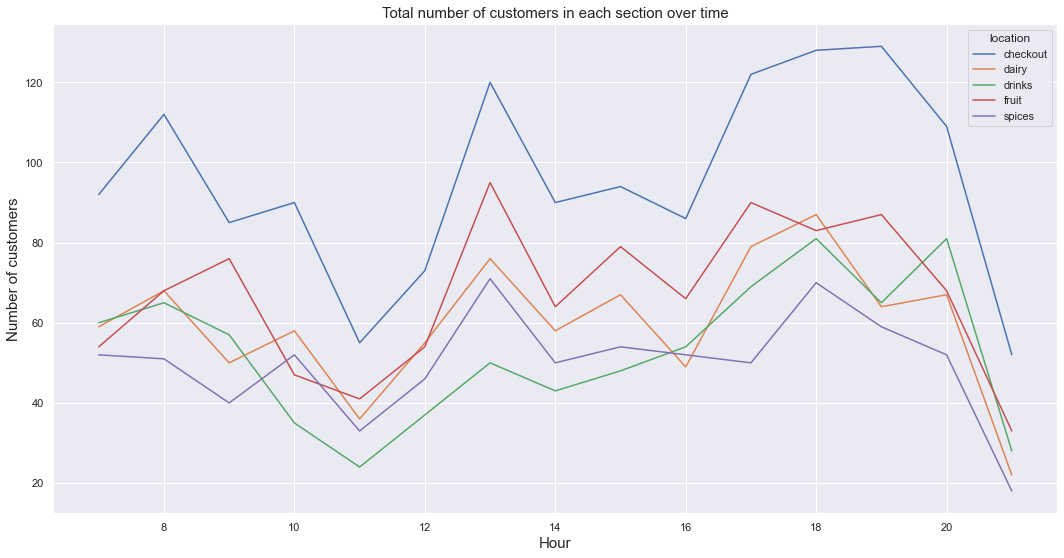

In [451]:
#plotting the total number of customers in each section over time
plot_customer_time_per_section(DAY)

***

*Displaying the number of customers at checkout over time*

In [452]:
#examining the total number of customers in one particular section over time
def customer_time_specific_section(df, specific_location):
    '''
    Total number of customers in one particular section over time
    
    Argument: DataFrame, specific_location in '' (e.g. 'fruit')
    Return: DataFrame with the hour as index and the total number of customers as column for the specified location
    '''
    customer_time_specific_section = customer_time_per_section(df).xs(specific_location)
    return pd.DataFrame(customer_time_specific_section)

In [453]:
#examining the total number of customers in one particular section over time
customer_time_specific_section(DAY, 'fruit')

,customer_no
hour,
7,54
8,68
9,76
10,47
11,41
12,54
13,95
14,64
15,79


In [454]:
#defining function to plot the total number of customers in a specific section over time
def plot_customer_time_specific_section(df, specific_location):
    '''
    Plots the total number of customers in one particular section over time
    
    Args: DataFrame, specific_location in '' (e.g. 'fruit')
    Return: DataFrame with the hour as index and the total number of customers as column for the specified location
    '''
    
    customer_time_reset = customer_time_specific_section(df,specific_location).reset_index()
    sns.lineplot(data=customer_time_reset, x= 'hour', y='customer_no')
    sns.set_theme(style="whitegrid", palette = "Set2")
    sns.set(rc = {'figure.figsize':(18,9)})
    plt.xlabel('Hour', size=15)
    plt.ylabel('Number of customers', size=15)
    plt.title(f'Total number of customers in the section {specific_location} over time', size=15);
    return plt.show()

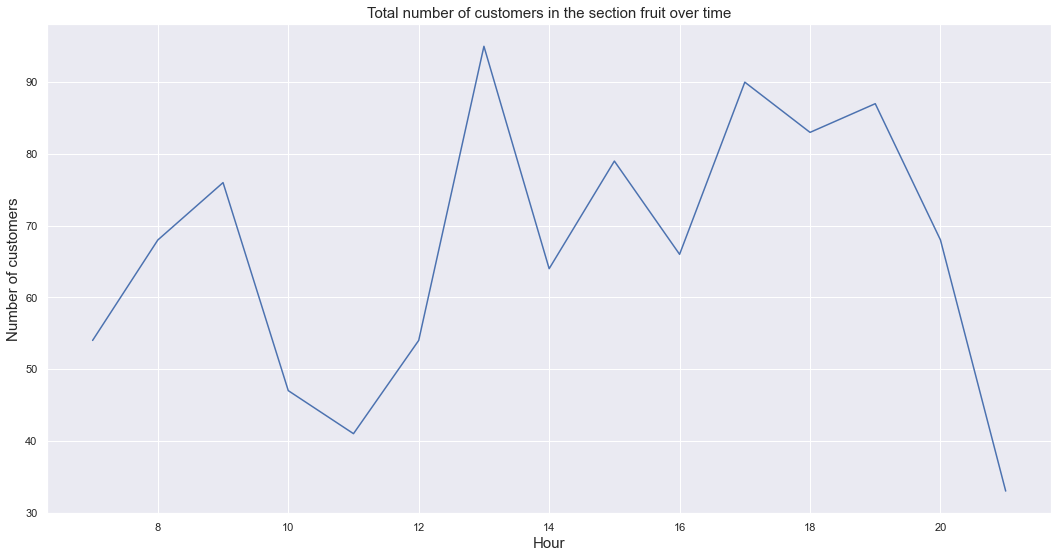

In [455]:
#Plotting the total number of customers in a specific section over time
plot_customer_time_specific_section(DAY, 'fruit')

***

*Calculating the time each customer spent in the supermarket*

In [469]:
#Calcuting the time each customer spends in the supermarket
time = pd.DataFrame(DAY.groupby('customer_no')['timestamp'].max() - DAY.groupby('customer_no')['timestamp'].min())
time
#time['minute'] = time['timestamp'].dt.minute

,timestamp
customer_no,
1,0 days 00:02:00
2,0 days 00:03:00
3,0 days 00:02:00
4,0 days 00:04:00
5,0 days 00:01:00
...,...
1443,0 days 00:01:00
1444,0 days 00:01:00
1445,0 days 00:00:00


***

*Calculating the total number of customers in the supermarket over time*

<AxesSubplot:xlabel='timestamp'>

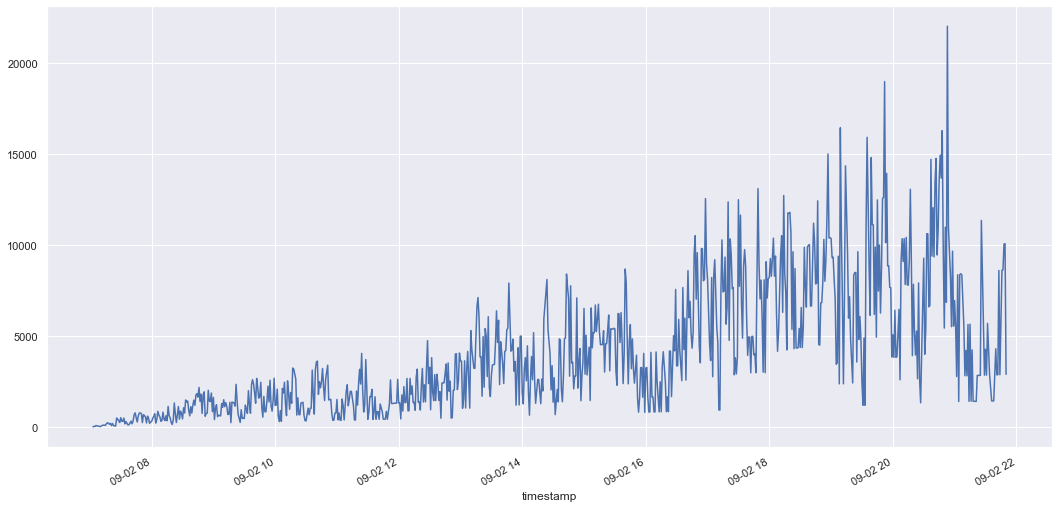

In [457]:
DAY.groupby('timestamp')['customer_no'].sum().plot()

***

## Transition probabilities 

*Creating aisle pathway for each costumer*

In [461]:
#define function to create a pathway for each customer and store them in a cell, comma seperated
def costumer_pathway(df):
    '''
    Function to create a pathway for each customer and store them in a cell, comma seperated

    Args: DataFrame of DAY 
    Return: returns DataFrame with a column 'costumer_pathway', adding up all locations of each costumer, comma-seperated, from entrance to checkout
    '''
    #summing up the pathway for each customer
    costumer_pathway= pd.DataFrame(df.groupby('customer_no')['location'].transform(lambda x: ', '.join(x)))
    
    #adding entrance to the location (each costomer should have a pathway from 'entrance', ...., to 'checkout')
    costumer_pathway['location'] = 'entrance' + ', ' + costumer_pathway['location']
    
    #removing all customers that did not go through checkout (the last customers were just thrown out as the store was closing up)
    contains_checkout = costumer_pathway['location'].str.contains('checkout', case=False)
    costumer_pathway['contains_checkout'] = contains_checkout
    costumer_pathway = costumer_pathway[costumer_pathway['contains_checkout'] == True] 
    costumer_pathway.drop(columns='contains_checkout', inplace=True)
    
    #rename the column 'location' to 'costumer_pathway' to make the DataFrame more explicit
    costumer_pathway.rename(columns = {'location': 'costumer_pathway'}, inplace = True)
    return costumer_pathway


In [462]:
#calling the function pathway on predefined DAY and assigning it to a variable
costumer_pathway_df = costumer_pathway(DAY) #for each costumers his/her pathway was added up from entrance to checkout, costumers WITHOUT checkout were removed 
costumer_pathway_df.head(10)

,costumer_pathway
0,"entrance, dairy, checkout"
1,"entrance, dairy, checkout"
2,"entrance, dairy, checkout"
3,"entrance, dairy, checkout"
4,"entrance, spices, checkout"
5,"entrance, spices, dairy, spices, drinks, spice..."
6,"entrance, spices, drinks, spices, fruit, checkout"
7,"entrance, fruit, checkout"
8,"entrance, dairy, checkout"
9,"entrance, spices, checkout"


In [ ]:
#dummy_matrix


***

## Monte Carlo Markov Chain

In [ ]:
#dummy-matrix
pd.crosstab(df['after'], df['before'], normalize=0)

***

## Classes for supermarket and customer

***

## CSV Output